In [15]:
import pandas 
import matplotlib.pyplot as plt
import seaborn as sns

Importing and Inspecting the Data

In [10]:
data=pandas.read_csv('Multiclass Diabetes Dataset.csv')
print(data.head())
# type of each column

   Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  Class
0       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0      0
1       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0      0
2       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0      0
3       0   45   2.3  24    4.0   2.9  1.0  1.0  1.5   0.4  21.0      0
4       0   50   2.0  50    4.0   3.6  1.3  0.9  2.1   0.6  24.0      0


In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB
None


In [12]:
# number of unique values in each column
print(data.nunique())

Gender     2
AGE       42
Urea      83
Cr        90
HbA1c     74
Chol      57
TG        45
HDL       25
LDL       45
VLDL      33
BMI       38
Class      3
dtype: int64


Handling Missing Data

In [ ]:
# data.fillna(
#     {
#         'ph': data['ph'].mean(),
#         'Sulfate': data['Sulfate'].mean(),
#         'Trihalomethanes': data['Trihalomethanes'].mean()
#     },
#     inplace=True
# )

Exploring Data Characteristics

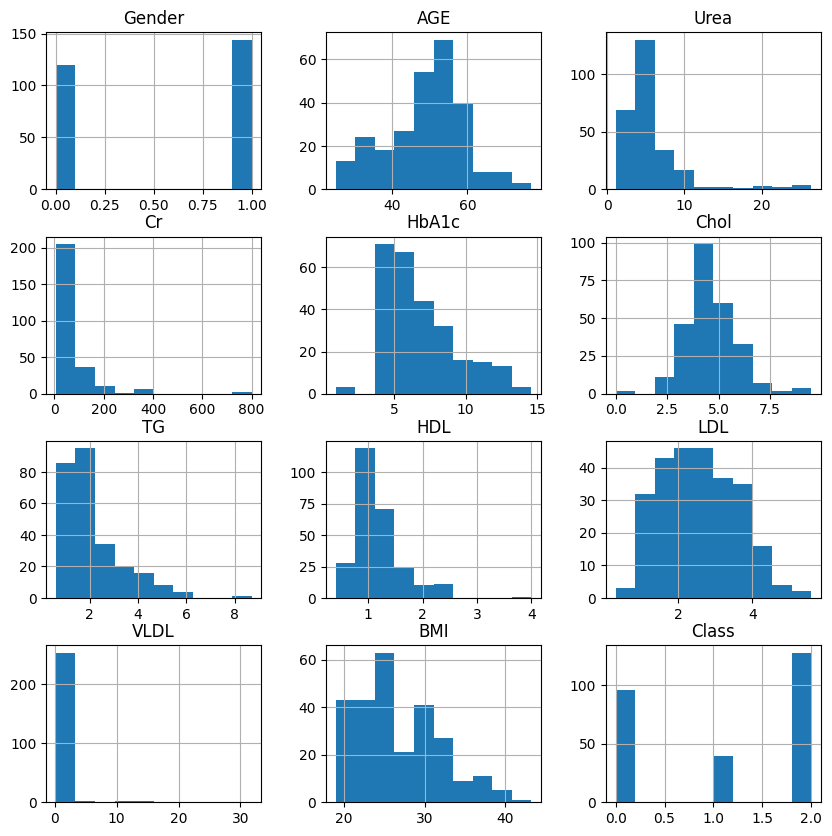

In [18]:
# histogram of each column
data.hist(figsize=(10, 10))
plt.show()


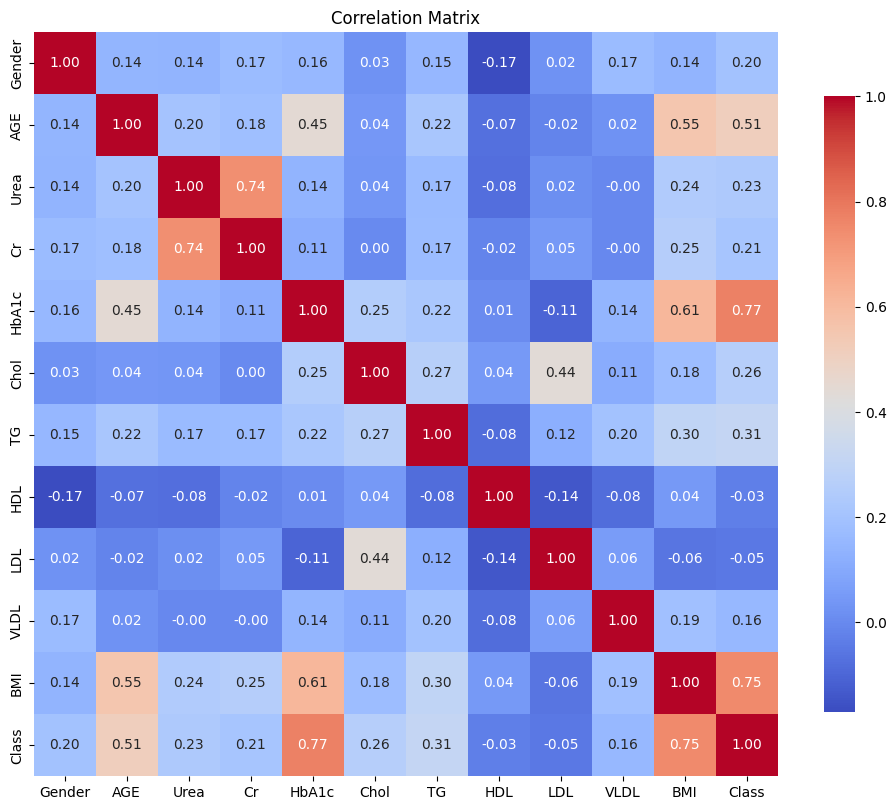

In [17]:
# correlation matrix
correlation_matrix = data.corr()    
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})  
plt.title('Correlation Matrix')
plt.show()  

Handling Outliers

In [ ]:
# remove outliers
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

(177, 12)


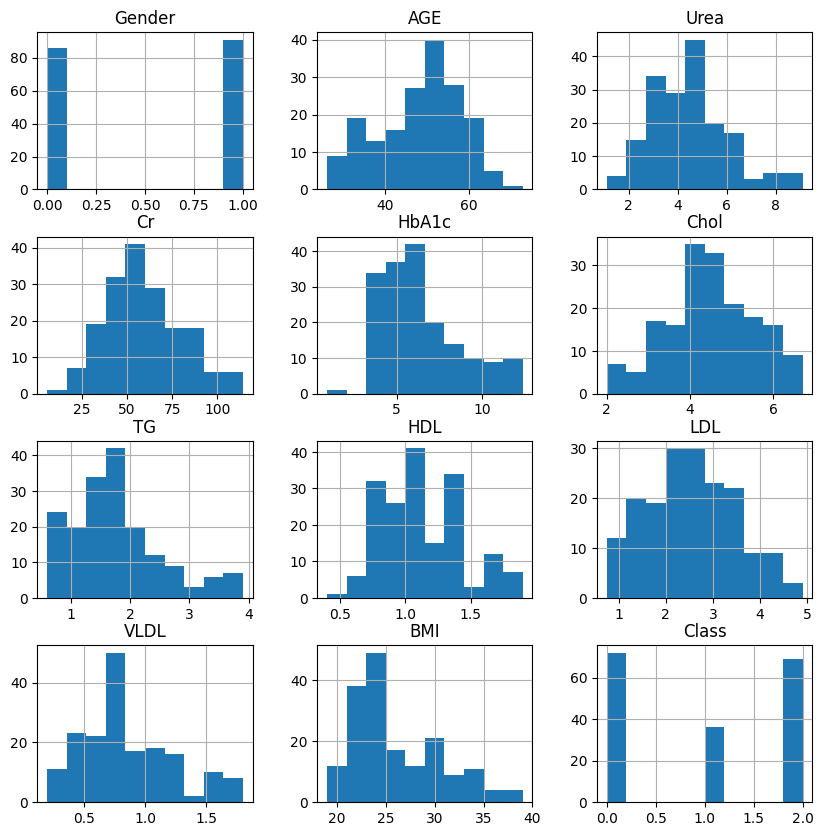

In [23]:
# histogram of each column
data.hist(figsize=(10, 10))
plt.show()


Performing Data Transformation

In [21]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))
data_scaled = pandas.DataFrame(data_scaled, columns=data.select_dtypes(include=['float64', 'int64']).columns)
# display the first few rows of the scaled data
print(data_scaled.head())
# save the cleaned data to a new CSV file

     Gender       AGE      Urea        Cr     HbA1c      Chol        TG  \
0  0.972139 -2.320579  0.021413  0.141826 -0.686638 -0.759061 -0.467951   
1  0.972139 -1.591204  1.691600 -0.633562 -0.686638  0.380335 -0.983207   
2 -1.028659 -0.340846 -1.391822 -1.699719 -1.079108 -1.518658 -0.983207   
3 -1.028659  0.180136 -1.584536 -0.439715 -1.079108 -0.854010 -0.596765   
4  0.972139 -0.028257  0.149889 -0.585100 -1.079108 -1.518658 -1.240835   

        HDL       LDL      VLDL       BMI     Class  
0 -0.020657 -0.482367 -0.678081 -0.577725 -1.101619  
1 -0.974473 -0.589224 -1.216289 -1.014508 -1.101619  
2 -0.338596 -1.123510 -1.216289 -1.014508 -1.101619  
3 -0.656534 -0.482367 -0.678081 -0.359334 -1.101619  
4 -0.656534 -1.016653 -1.216289 -0.359334 -1.101619  


In [25]:
#  save the cleaned data to a new CSV file
data_scaled.to_csv('cleaned_multiclass_diabetes_dataset.csv', index=False)